# Microsoft's Journey into Film: 3 Key Recommendations for Optimal Profit
* Madelie Birch
* DSC Flex
* December 20, 2022; 12:00 pm EST
* Mark Barbour
<p class="center">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPQ5o5AsVIoMkANy-BpZWBQmUnqAV1wVq9Hzv8uwJpjw&s.jpg" alt="Microsoft's logo">
</p>

## Dependent variable: profit (ROI)
Profit, or return on investment, is the most suitable variable with which to measure the our movie data. For a corporation like Microsoft, it makes most sense that profit would be of highest interest to stakeholders. Where gross revenue can give an impressive look at how a specific film does in the boxoffice, both domestic and worldwide, profit gives us the most accurate view on the company's financial health following an investment as lofty as a movie production. Profit provides payment to C-suite, reimburses production expenses, and increases the overall value of the company for shareholders across the globe.

## Independent variables: budget, genre & release month
For this project, let's analyze the relationship between profit and 4 key independent variables: budget, genre, and release month. Budgets, depending on how high or low they are, affect a film studio's total profit following movie release and sales. Genres, which trend by the decade, also play an important role in how well a movie performs financially. Finally, the time of year in which a film is released influences a studio's profit potential. 

# INDEPENDENT VARIABLE #1: BUDGET

Let's now grab hold of our first dataset: 'movie_budgets.csv'. We will load the dataset, read it, get a sense of the resulting DataFrame, and begin our cleaning process by eliminating NaN values in relevant columns.

In [1]:
# Unzipping and reading the 'movie_budgets.csv' file into a pandas DataFrame as 'movie_budgets'
import gzip
import pandas as pd
with gzip.open('Data/tn.movie_budgets.csv.gz', 'rb') as f:
    movie_budgets = pd.read_csv(f)
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [2]:
# Cleaning DataFrame by filling in any NaN value with '0' so that we can later calculate profit
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].fillna(0)
movie_budgets['production_budget'] = movie_budgets['production_budget'].fillna(0)

# Seeing if our cleaning method worked by printing number of NaN values in each column of movie_budgets
print(movie_budgets.isnull().sum(axis=0))


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [3]:
# Viewing modified DataFrame
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


We will then will modify our DataFrame by converting strings to numeric values so that the data can be further manipulated.

In [4]:
# Removing currency symbols and commas from the 'production_budget', 'domestic_gross' & 'worldwide_gross' columns
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '')

<ipython-input-4-984e08bcef9b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '')
<ipython-input-4-984e08bcef9b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '')
<ipython-input-4-984e08bcef9b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gros

In [5]:
# Converting the 'production_budget', 'domestic_gross' and 'worldwide_gross' columns from dtype 'object' to 
# dtype 'int64' and confirming by printing a new list of columns and corresponding dtypes 
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype('int64')
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype('int64')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype('int64')
print(movie_budgets.dtypes)

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object


In [6]:
print(movie_budgets.dtypes)

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object


Now that we have successfully made all data workable, let's calculate the profit for each film. 

In [7]:
# Creating a new column 'profit' in the DataFrame and calculating the profit values
movie_budgets = movie_budgets.assign(profit=movie_budgets['worldwide_gross'] - movie_budgets['production_budget'])

movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [8]:
movie_budgets.shape

(5782, 7)

It's time to sort the DataFrame by profit and categorize each film's budget as low, mid, or high.

In [9]:
# Sorting the DataFrame by 'profit' in descending order
movie_budgets.sort_values(by='profit', ascending=False, inplace=True)

# Printing top 10 resulting 'movie' titles with their corresponding 'production_budget' and profit' values
top_10 = movie_budgets.head(10)
top_10


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799


In [10]:
# Creating a new column 'budget_categories' in movie_budgets DataFrame that assigns each film to low, mid, or high 
# budget categories using a custom Python function
def budget_categories(budget):
    if budget < 1000000:
        return 'Low'
    elif budget >= 1000000 and budget < 100000000:
        return 'Mid'
    else:
        return 'High'

movie_budgets['budget_categories'] = movie_budgets['production_budget'].apply(budget_categories)

movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,budget_categories
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,High
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,High
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,High
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,High
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,High
...,...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,High
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,High
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,High
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000,High


According to our DataFrame, high budgets tend overall to yield high profits. In this case, a high budget of over 100,000,000 USD can yield profits up to 1,433,854,864 - 2,351,345,279 USD. That's a LOT of money, Microsoft! You're raking in billions. Just make sure you spend that budget wisely! Hire the best writers, actors, and production team you can find to build the best film studio you can think of.

Finally, we can execute data visualizations that show us the overall relationship between budget and profit in our DataFrame.

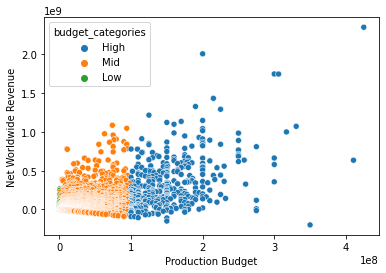

<Figure size 720x720 with 0 Axes>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the scatterplot using seaborn
sns.scatterplot(x='production_budget', y='profit', hue='budget_categories', data=movie_budgets)

# Assigning appropriate axis labels
plt.xlabel('Production Budget')
plt.ylabel('Net Worldwide Revenue')
plt.figure(figsize=(10,10))

# Saving scatterplot as a JPEG file
plt.savefig('scatterplot.png', format='png')

plt.show()



A scatterplot is an attractive way to visualize data, but here we can see that the data is so expansive and the clustering is so thick and horizontal that it's a bit hard to understand whether a mid or high budget film would be most successful, despite the obvious high budget/high profit outliers. let's try a boxplot. We will make one that represents the relationship between median profit by budget.

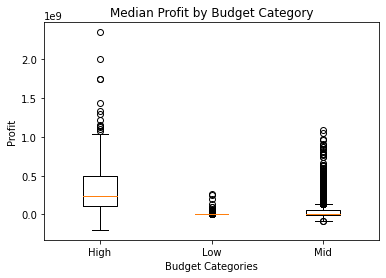

In [12]:
import matplotlib.pyplot as plt

# Grouping the data by 'budget_categories' and calculate the median 'profit' for each group
budget_profit_medians = movie_budgets.groupby('budget_categories')['profit'].median()

# Creating a list of the budget categories in the order of appearance on x-axis
budget_categories = list(budget_profit_medians.index)

# Creating a boxplot using Matplotlib
plt.boxplot([movie_budgets[movie_budgets['budget_categories'] == budget_category]['profit'] for budget_category in budget_categories])

# Setting the x-axis labels to the budget categories
plt.xticks(range(1, len(budget_categories)+1), budget_categories)

# Labelling the x-axis and y-axis
plt.xlabel('Budget Categories')
plt.ylabel('Profit')

# Adding a title to the plot
plt.title('Median Profit by Budget Category')

# Saving plot as a PNG file and showing the plot
plt.savefig('boxplot.png', format='png')
plt.show()


Here, we see a clear representation of high budget to high profit correlation. The box indicating high budget prodution is much longer and higher than the low and mid budget boxes, which shows that 50% of high budget films have a budget of over 100,000,000 and generate the highest profit. Microsoft has the potential to be as successful as James Cameron's Avatar, which made over 2 BILLION USD in profit! Wow!

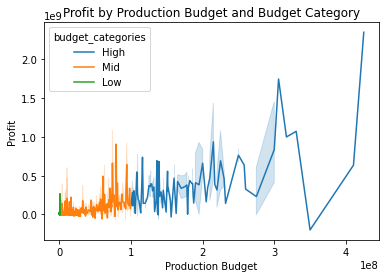

<Figure size 720x432 with 0 Axes>

In [13]:
import seaborn as sns

# Create the line plot
sns.lineplot(x='production_budget', y='profit', hue='budget_categories', data=movie_budgets, sort=True)

# Add a title and axis labels
plt.title('Profit by Production Budget and Budget Category')
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.figure(figsize=(10, 6))


# Show the plot
plt.savefig('scatterplot2.png', format='png')
plt.show()


# INDEPENDENT VARIABLE #2: GENRE

Time to look at profit as influenced by genre. We will explore a new dataset, load a new DataFrame, and identify the trends of today: what's hot? What gets people to the theaters and buying/renting online? Let's take a look:

In [14]:
# Reading pulled dataset 'movies_metadata.csv' into a pandas DataFrame 'genre_df'
df = pd.read_csv('Data/movies_metadata.csv', low_memory=False)
genre_df = df
genre_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [15]:
# Calling dtypes attribute to disaply each column's datatype
genre_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [16]:
# Calling 
nan_count_budget = genre_df['budget'].isnull().sum()
nan_count_revenue = genre_df['revenue'].isnull().sum()

print(nan_count_budget)
print(nan_count_revenue)

0
6


In [17]:
genre_df = genre_df.dropna(subset=['revenue'])
genre_df['revenue'].fillna(0, inplace=True)
genre_df['revenue'].isnull().sum()

<ipython-input-17-bd35f6ae70b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['revenue'].fillna(0, inplace=True)


0

In [18]:
# Converting the 'budget' column to a numeric type, ignoring non-numeric values
genre_df['budget_numeric'] = pd.to_numeric(genre_df['budget'], errors='coerce')

# Dropping rows with NaN values in new column 'budget_numeric'
genre_df = genre_df.dropna(subset=['budget_numeric'])

# Converting the 'budget_numeric' column to dtype float
genre_df['budget_numeric'] = genre_df['budget_numeric'].astype('float64')


<ipython-input-18-bed31132a4b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['budget_numeric'] = pd.to_numeric(genre_df['budget'], errors='coerce')


In [19]:
# Ensuring 'budget_numeric' column creation and conversion was successful
genre_df['budget_numeric'].dtype

dtype('float64')

In [20]:
# Creating a new 'profit' column that calculates the profit for each row
genre_df = genre_df.assign(profit=genre_df['revenue'] - genre_df['budget_numeric'])

# Displaying the rows with the top 1000 highest 'profit' values
top_10_profits = genre_df.nlargest(10, 'profit')
top_10_profits

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,budget_numeric,profit
14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,237000000.0,2.550965e+09
26555,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,...,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.5,7993.0,245000000.0,1.823224e+09
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,200000000.0,1.645034e+09
25084,False,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,Jurassic World,Twenty-two years after the events of Jurassic ...,...,124.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,Jurassic World,False,6.5,8842.0,150000000.0,1.363529e+09
28830,False,"{'id': 9485, 'name': 'The Fast and the Furious...",190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,168259,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,...,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,False,7.3,4253.0,190000000.0,1.316249e+09
17818,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,False,7.4,12000.0,220000000.0,1.299558e+09
17437,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://www.harrypotter.com,12445,tt1201607,en,Harry Potter and the Deathly Hallows: Part 2,"Harry, Ron and Hermione continue their quest t...",...,130.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It all ends here.,Harry Potter and the Deathly Hallows: Part 2,False,7.9,6141.0,125000000.0,1.217000e+09
26558,False,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,False,7.3,6908.0,280000000.0,1.125404e+09
22110,False,"{'id': 386382, 'name': 'Frozen Collection', 'p...",150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://movies.disney.com/frozen,109445,tt2294629,en,Frozen,Young princess Anna of Arendelle dreams about ...,...,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Only the act of true love will thaw a frozen h...,Frozen,False,7.3,5440.0,150000000.0,1.124219e+09
42222,False,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,321612,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,...,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",

In [21]:
import ast

# Grouping the DataFrame by genre and calculating the mean profit for each group
mean_profit_by_genre = genre_df.groupby('genres')['profit'].mean()

# Sorting the resulting series in descending order and selecting top 4 rows
top_4_genres = mean_profit_by_genre.sort_values(ascending=False).reset_index().head(4)

# Defining a function to extract the name of the first genre from the genres list and print the genre and 
# mean profit values
def print_values(row):
  # Parse the string and convert it to a list of dictionaries
  genres = ast.literal_eval(row['genres'])
  genre = genres[0].get('name')
  profit = row["profit"]
  print(f'Genre: {genre}, Mean Profit: {profit}')

# Applying the function to the top 4 rows
top_4_genres.apply(print_values, axis=1)


Genre: Action, Mean Profit: 940063384.0
Genre: Family, Mean Profit: 791550600.0
Genre: Adventure, Mean Profit: 788212738.0
Genre: Science Fiction, Mean Profit: 782465326.0


0    None
1    None
2    None
3    None
dtype: object

Now, let's create a visualization that shows a relationship between the top 4 genres and their mean profits: 

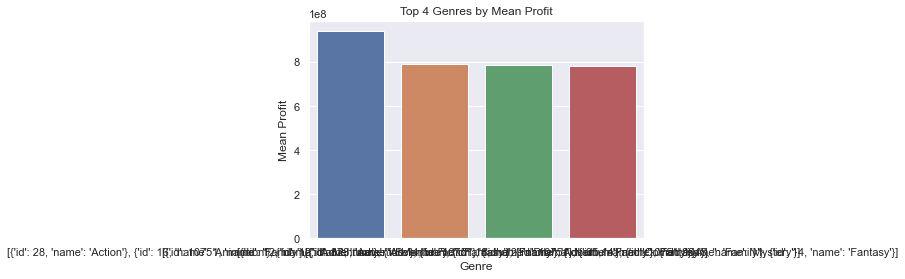

In [22]:
import seaborn as sns

# Set the style and context of the plot
sns.set(style="darkgrid")

# Create a bar plot using the top 4 genres and their mean profits
ax = sns.barplot(x="genres", y="profit", data=top_4_genres)

# Add labels and title to the plot
ax.set(xlabel="Genre", ylabel="Mean Profit")
ax.set_title("Top 4 Genres by Mean Profit")

# Show the plot
plt.show()


We've manipulated and analyzed the data, and found the top 4 genres: Action, Family, Adventure, and Science Fiction, all of which combined yield an average profit between 782,465,326 USD and 940,063,384 USD, with Action averaging the highest. WOW! Make an action movie, Microsoft! Think Top Gun, Avengers, anything with high intensity action sequences and fight scenes with a hero vs. villain plot arc. 

# INDEPENDENT VARIABLE #3: RELEASE MONTH

The time of year in which a film is release matters greatly to the studio's profit outcomes. Let's make a copy and sort through our previous DataFrame, clean it, and sort it to see which months yiled highest net revenues. 

In [23]:
# Making a copy of DataFrame 'genre_df' and renaming it 'releasemonth_df'
releasemonth_df = genre_df.copy()
releasemonth_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'budget_numeric', 'profit'],
      dtype='object')

In [24]:
releasemonth_df[releasemonth_df['release_date'].isnull()]


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,budget_numeric,profit
711,False,NaN,0,[],NaN,365371,tt0114894,en,War Stories Our Mother Never Told Us,Seven New Zealand women speak about their live...,...,95.0,[],Released,NaN,War Stories Our Mother Never Told Us,False,0.0,0.0,0.0,0.0
734,False,NaN,0,[],NaN,215107,tt0105737,en,Vermont Is for Lovers,Vermont is for Lovers is an independently prod...,...,88.0,[],Released,NaN,Vermont Is for Lovers,False,0.0,0.0,0.0,0.0
3460,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,94214,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",...,90.0,[],NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",False,0.0,0.0,0.0,10.0
3628,False,NaN,0,[],NaN,207731,tt0217287,en,Boricua's Bond,"Tommy, a talented Puerto Rican painter living ...",...,105.0,[],Released,NaN,Boricua's Bond,False,2.0,1.0,0.0,0.0
5879,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,99885,tt0979876,en,Divine Intervention,Four friends fight an insane man's crusade to ...,...,87.0,[],Released,His Judgement Cometh...,Divine Intervention,False,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,False,NaN,0,[],NaN,438910,tt0810384,ru,Konstruktor krasnogo tsveta -1993,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,...,76.0,[],Released,NaN,Engineering Red,False,6.0,2.0,0.0,0.0
45203,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",NaN,433711,tt3158690,en,All Superheroes Must Die 2: The Last Superhero,"In a no holds barred documentary, acclaimed jo...",...,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All Superheroes Must Die 2: The Last Superhero,False,4.0,1.0,0.0,0.0
45338,False,NaN,0,[],NaN,335251,tt1883368,en,The Land Where the Blues Began,An exploration of the musical and social origi...,...,0.0,[],Released,NaN,The Land Where the Blues Began,False,0.0,0.0,0.0,0.0
45410,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,449131,tt0321264,ru,Aprel,NaN,...,NaN,[],Released,NaN,Aprel,False,6.0,1.0,0.0,0.0


In [25]:
# Dropping all NaN values in column 'release_date' as they are unnecessary in this context 
releasemonth_df.dropna(subset=['release_date'], inplace=True)
releasemonth_df.isnull().sum()

adult                        0
belongs_to_collection    40888
budget                       0
genres                       0
homepage                 37610
id                           0
imdb_id                     14
original_language           11
original_title               0
overview                   941
popularity                   0
poster_path                339
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
video                        0
vote_average                 0
vote_count                   0
budget_numeric               0
profit                       0
dtype: int64

In [26]:
# Converting the 'release_date' column to datetime and setting invalid values to NaN
releasemonth_df['release_date'] = pd.to_datetime(releasemonth_df['release_date'], errors='coerce')

# Dropping rows with NaN values in column 'release_date' 
releasemonth_df.dropna(subset=['release_date'], inplace=True)

# Extracting the month from the 'release_date' column into a new column 'month'
releasemonth_df['month'] = releasemonth_df['release_date'].dt.month
print(releasemonth_df['month'])

0        10
1        12
2        12
3        12
4         2
         ..
45460     5
45462    11
45463     8
45464    10
45465     6
Name: month, Length: 45376, dtype: int64


In [27]:
# Grouping the DataFrame by month and calculating the mean profit for each month
monthly_profit = releasemonth_df.groupby('month')['profit'].mean()

# Sorting the resulting series in descending order and selecting the top 5 months
highest_profit_months = monthly_profit.sort_values(ascending=False).head(5)
print(highest_profit_months)

month
6     1.614214e+07
7     1.307870e+07
5     1.169301e+07
12    1.157185e+07
11    9.320107e+06
Name: profit, dtype: float64


In [28]:
releasemonth_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'budget_numeric', 'profit', 'month'],
      dtype='object')

Let's visualize these findings:

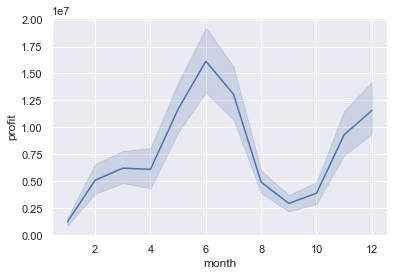

In [29]:
# Importing seaborn and matplotlib again, for good measure
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("darkgrid")

# Create a lineplot with the 'month' column on the x-axis and the 'profit' column on the y-axis
sns.lineplot(x="month", y="profit", data=releasemonth_df)

# Show the plot
plt.show()


Looks like profits skyrocket between May and July, peaking the highest in June, with average profits hitting 16,142,140 USD. Profits spike again during the Holidays, hitting 11,571,850 USD in December. If Microsoft wants to be successful and reap the highest possible profit, they ought to market and release their films as either Summer or Christmas/New Years blockbuster events.

# IN CONCLUSION,
If Microsoft desires to enter the film industry and be successful, that is, rake in the highest potential profits, they ought to stay consistent on 3 key variables: keep it high production budget (wisely spent) to dazzle their audiences, action/adventure-oriented to keep audiences on the edge of their seats, and release their best work in the month of June.